---
# <center>Clustering</center>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.cluster as cluster
np.random.seed(1234)
warnings.filterwarnings("ignore")

In [2]:
def myscatter(data,assignment):
    sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)', hue=assignment, palette=sns.color_palette('Set1', as_cmap=True))

# Load the data

In [3]:
data = pd.read_csv('data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.set_index('CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

# K-means

In [6]:
kmeans = cluster.KMeans( n_clusters=5, init='random', verbose=1).fit(X)

Initialization complete
Iteration 0, inertia 99469.0.
Iteration 1, inertia 71736.38918340162.
Iteration 2, inertia 70888.37998445192.
Iteration 3, inertia 70860.62459954232.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 112152.0.
Iteration 1, inertia 74389.40436219952.
Iteration 2, inertia 69072.58073083418.
Iteration 3, inertia 66818.01099948955.
Iteration 4, inertia 66790.25561457996.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 181015.0.
Iteration 1, inertia 84998.27618001183.
Iteration 2, inertia 54501.90460490118.
Iteration 3, inertia 46820.71614446576.
Iteration 4, inertia 44917.08619298226.
Iteration 5, inertia 44474.83570937371.
Iteration 6, inertia 44448.45544793369.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 200379.0.
Iteration 1, inertia 83359.45978331694.
Iteration 2, inertia 73428.81491325662.
Iteration 3, inertia 66965.31487727379.
Ite

In [7]:
kmeans.inertia_

44448.45544793369

In [8]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

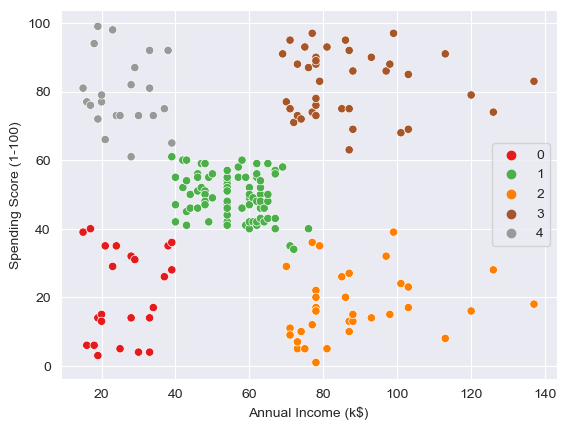

In [9]:
myscatter(data, kmeans.labels_)

# Improved initialization: kmeans++

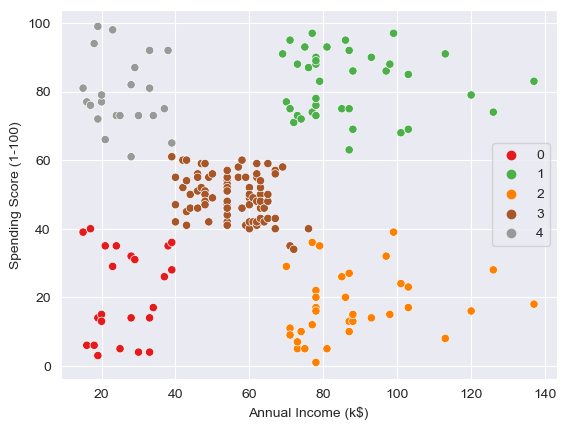

In [10]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++').fit(X)
myscatter(data, kmeans.labels_)

# DBSCAN:
## Density-Based Spatial Clustering of Applications with Noise


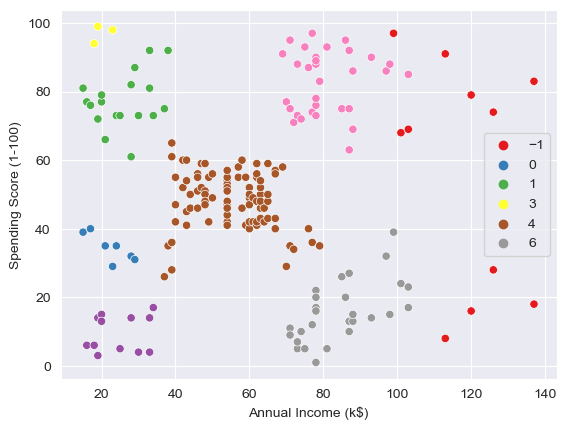

In [11]:
dbscan = cluster.DBSCAN(eps=9, min_samples=3).fit(X)
myscatter(data, dbscan.labels_)

# Prediction

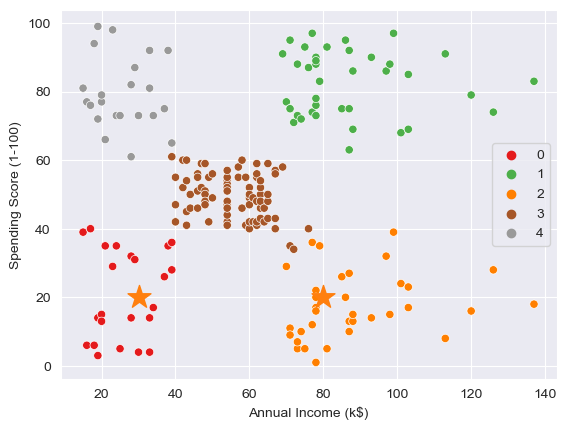

In [12]:
Xnew = np.array([[30,20],[80,20]])
myscatter(data, kmeans.labels_)
plt.scatter(Xnew[:,0],Xnew[:,1],marker='*',s=300)

In [13]:
kmeans.predict(Xnew)

array([0, 2])